# Regression in Python

***
This is a very quick run-through of some basic statistical concepts, adapted from [Lab 4 in Harvard's CS109](https://github.com/cs109/2015lab4) course. Please feel free to try the original lab if you're feeling ambitious :-) The CS109 git repository also has the solutions if you're stuck.

* Linear Regression Models
* Prediction using linear regression

Linear regression is used to model and predict continuous outcomes with normal random errors. There are nearly an infinite number of different types of regression models and each regression model is typically defined by the distribution of the prediction errors (called "residuals") of the type of data. Logistic regression is used to model binary outcomes whereas Poisson regression is used to predict counts. In this exercise, we'll see some examples of linear regression as well as Train-test splits.

The packages we'll cover are: `statsmodels`, `seaborn`, and `scikit-learn`. While we don't explicitly teach `statsmodels` and `seaborn` in the Springboard workshop, those are great libraries to know.
***

<img width=600 height=300 src="https://imgs.xkcd.com/comics/sustainable.png"/>
***

In [1]:
# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")


In [2]:
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

***
# Part 1: Introduction to Linear Regression
### Purpose of linear regression
***
<div class="span5 alert alert-info">

<p> Given a dataset containing predictor variables $X$ and outcome/response variable $Y$, linear regression can be used to: </p>
<ul>
  <li> Build a <b>predictive model</b> to predict future values of $\hat{Y}$, using new data $X^*$ where $Y$ is unknown.</li>
  <li> Model the <b>strength of the relationship</b> between each independent variable $X_i$ and $Y$</li>
    <ul>
      <li> Many times, only a subset of independent variables $X_i$ will have a linear relationship with $Y$</li>
      <li> Need to figure out which $X_i$ contributes most information to predict $Y$ </li>
    </ul>
   <li>It is in many cases, the first pass prediction algorithm for continuous outcomes. </li>
</ul>
</div>

### A Brief Mathematical Recap
***

[Linear Regression](http://en.wikipedia.org/wiki/Linear_regression) is a method to model the relationship between a set of independent variables $X$ (also knowns as explanatory variables, features, predictors) and a dependent variable $Y$.  This method assumes the relationship between each predictor $X$ is **linearly** related to the dependent variable $Y$. The most basic linear regression model contains one independent variable $X$, we'll call this the simple model. 

$$ Y = \beta_0 + \beta_1 X + \epsilon$$

where $\epsilon$ is considered as an unobservable random variable that adds noise to the linear relationship. In linear regression, $\epsilon$ is assumed to be normally distributed with a mean of 0. In other words, what this means is that on average, if we know $Y$, a roughly equal number of predictions $\hat{Y}$ will be above $Y$ and others will be below $Y$. That is, on average, the error is zero. The residuals, $\epsilon$ are also assumed to be "i.i.d.": independently and identically distributed. Independence means that the residuals are not correlated -- the residual from one prediction has no effect on the residual from another prediction. Correlated errors are common in time series analysis and spatial analyses.

* $\beta_0$ is the intercept of the linear model and represents the average of $Y$ when all independent variables $X$ are set to 0.

* $\beta_1$ is the slope of the line associated with the regression model and represents the average effect of a one-unit increase in $X$ on $Y$.

* Back to the simple model. The model in linear regression is the *conditional mean* of $Y$ given the values in $X$ is expressed a linear function.  

$$ y = f(x) = E(Y | X = x)$$ 

![conditional mean](images/conditionalmean.png)
http://www.learner.org/courses/againstallodds/about/glossary.html

* The goal is to estimate the coefficients (e.g. $\beta_0$ and $\beta_1$). We represent the estimates of the coefficients with a "hat" on top of the letter.  

$$ \hat{\beta}_0, \hat{\beta}_1 $$

* Once we estimate the coefficients $\hat{\beta}_0$ and $\hat{\beta}_1$, we can use these to predict new values of $Y$ given new data $X$.

$$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1$$

* Multiple linear regression is when you have more than one independent variable and the estimation involves matrices
    * $X_1$, $X_2$, $X_3$, $\ldots$


* How do you estimate the coefficients? 
    * There are many ways to fit a linear regression model
    * The method called **least squares** is the most common methods
    * We will discuss least squares

$$ Y = \beta_0 + \beta_1 X_1 + \ldots + \beta_p X_p + \epsilon$$ 
    
### Estimating $\hat\beta$: Least squares
***
[Least squares](http://en.wikipedia.org/wiki/Least_squares) is a method that can estimate the coefficients of a linear model by minimizing the squared residuals: 

$$ \mathscr{L} = \sum_{i=1}^N \epsilon_i^2 = \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2  = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

where $N$ is the number of observations and $\epsilon$ represents a residual or error, ACTUAL - PREDICTED.  

#### Estimating the intercept $\hat{\beta_0}$ for the simple linear model

We want to minimize the squared residuals and solve for $\hat{\beta_0}$ so we take the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta_0}$ 

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_0}} &= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= -2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \hspace{25mm} \mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N (y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i) \\
&= -2 \left[ \left( \sum_{i=1}^N y_i \right) - N \hat{\beta_0} - \hat{\beta}_1 \left( \sum_{i=1}^N x_i
\right) \right] \\
& 2 \left[ N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i \right] = 0 \hspace{20mm} \mbox{(Set equal to 0 and solve for $\hat{\beta}_0$)} \\
& N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i = 0 \\
& N \hat{\beta}_0 = \sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i}{N} \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i}{N} - \hat{\beta}_1 \frac{\sum_{i=1}^N x_i}{N} \\
& \boxed{\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}}
\end{align}
$

Using this new information, we can compute the estimate for $\hat{\beta}_1$ by taking the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta}_1$.

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_1}} &= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= 2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \left( -x_i \right) \hspace{25mm}\mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N x_i \left( y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i \right) \\
&= -2 \sum_{i=1}^N x_i (y_i - \hat{\beta}_0 x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N x_i (y_i - \left( \bar{y} - \hat{\beta}_1 \bar{x} \right) x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N (x_i y_i - \bar{y}x_i + \hat{\beta}_1\bar{x}x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \left[ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i + \hat{\beta}_1\bar{x}\sum_{i=1}^N x_i - \hat{\beta}_1 \sum_{i=1}^N x_i^2 \right] \\
&= -2 \left[ \hat{\beta}_1 \left\{ \bar{x} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i^2 \right\} + \left\{ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i \right\}\right] \\
& 2 \left[ \hat{\beta}_1 \left\{ \sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i \right\} + \left\{ \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right\} \right] = 0 \\
& \hat{\beta}_1 = \frac{-\left( \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right)}{\sum_{i=1}^N x_i^2 - \bar{x}\sum_{i=1}^N x_i} \\
&= \frac{\sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i}{\sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i} \\
& \boxed{\hat{\beta}_1 = \frac{\sum_{i=1}^N x_i y_i - \bar{x}\bar{y}n}{\sum_{i=1}^N x_i^2 - n \bar{x}^2}}
\end{align}
$

The solution can be written in compact matrix notation as

$$\hat\beta =  (X^T X)^{-1}X^T Y$$ 

We wanted to show you this in case you remember linear algebra, in order for this solution to exist we need $X^T X$ to be invertible. Of course this requires a few extra assumptions, $X$ must be full rank so that $X^T X$ is invertible, etc. Basically, $X^T X$ is full rank if all rows and columns are linearly independent. This has a loose relationship to variables and observations being independent respective. **This is important for us because this means that having redundant features in our regression models will lead to poorly fitting (and unstable) models.** We'll see an implementation of this in the extra linear regression example.

***
# Part 2: Exploratory Data Analysis for Linear Relationships

The [Boston Housing data set](https://archive.ics.uci.edu/ml/datasets/Housing) contains information about the housing values in suburbs of Boston.  This dataset was originally taken from the StatLib library which is maintained at Carnegie Mellon University and is now available on the UCI Machine Learning Repository. 


## Load the Boston Housing data set from `sklearn`
***

This data set is available in the [sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston) python module which is how we will access it today.  

In [30]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()

In [31]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [32]:
boston.data.shape

(506, 13)

In [33]:
# Print column names
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [34]:
# Print description of Boston housing data set
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Now let's explore the data set itself. 

In [35]:
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


There are no column names in the DataFrame. Let's add those. 

In [36]:
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Now we have a pandas DataFrame called `bos` containing all the data we want to use to predict Boston Housing prices.  Let's create a variable called `PRICE` which will contain the prices. This information is contained in the `target` data. 

In [37]:
print(boston.target.shape)

(506,)


In [38]:
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## EDA and Summary Statistics
***

Let's explore this data set.  First we use `describe()` to get basic summary statistics for each of the columns. 

In [39]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Scatterplots
***

Let's look at some scatter plots for three variables: 'CRIM' (per capita crime rate), 'RM' (number of rooms) and 'PTRATIO' (pupil-to-teacher ratio in schools).  

Text(0.5, 1.0, 'Relationship between CRIM and Price')

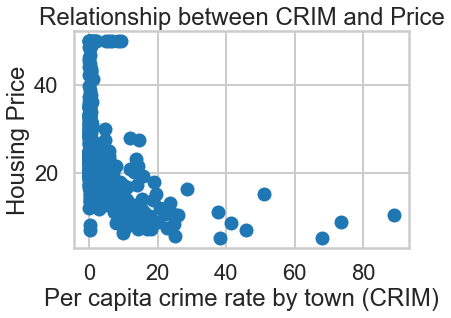

In [40]:
plt.scatter(bos.CRIM, bos.PRICE)
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Housing Price")
plt.title("Relationship between CRIM and Price")

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> What kind of relationship do you see? e.g. positive, negative?  linear? non-linear? Is there anything else strange or interesting about the data? What about outliers?</p>


<p><b>Exercise:</b> Create scatter plots between *RM* and *PRICE*, and *PTRATIO* and *PRICE*. Label your axes appropriately using human readable labels. Tell a story about what you see.</p>

<p><b>Exercise:</b> What are some other numeric variables of interest? Why do you think they are interesting? Plot scatterplots with these variables and *PRICE* (house price) and tell a story about what you see.</p>

</div>

In [41]:
# your turn: 
# 1. What kind of relationship do you see? e.g. positive, negative? linear? non-linear?
#Is there anything else strange or interesting about the data? What about outliers?
"""It is not a completely linear relationship. For lower values of CRIM, the housing prices are very high. 
Most houses are in the lower CRIM valued areas. There are some outliers. For higher crime rates, the prices of houses are
low in some cases.
"""

'For lower CRIM values, the housing price is very high. The relationship is not linear between the two. The Housing prices \nrange from low to high even though the CRIM values are still low. There are few outliers where the CRIM value is high but the \nhousing price is still low. \n'

Text(0.5, 1.0, 'Relationship between RM and Price')

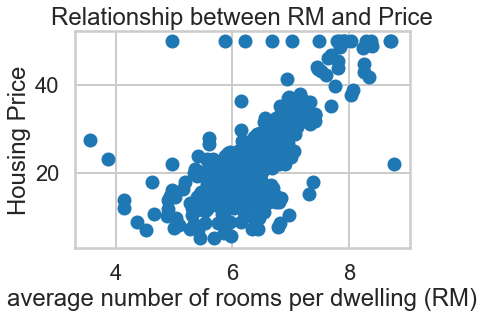

In [42]:
# your turn:
# 2. Create scatter plots between *RM* and *PRICE*, and *PTRATIO* and *PRICE*.
# Label your axes appropriately using human readable labels. Tell a story about what you see.
plt.scatter(bos.RM, bos.PRICE)
plt.xlabel("average number of rooms per dwelling (RM)")
plt.ylabel("Housing Price")
plt.title("Relationship between RM and Price")

''' The prices of houses increases almost linearly with increase in number of rooms. There are some outliers where the price
is low even if the houses have more rooms. There are between 5 and 8 rooms per house but the prices are still low. It also
looks like more people prefer houses with more than 5 and less than 8 rooms or,
Boston only has houses with 5 to 8 rooms available
'''

Text(0.5, 1.0, 'Relationship between pupil-teacher ratio by town and Price')

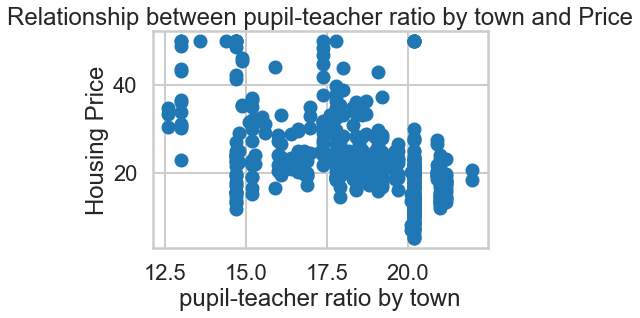

In [43]:
# your turn: scatter plot between *PTRATIO* and *PRICE*
plt.scatter(bos.PTRATIO, bos.PRICE)
plt.xlabel("pupil-teacher ratio by town")
plt.ylabel("Housing Price")
plt.title("Relationship between pupil-teacher ratio by town and Price")

Text(0.5, 1.0, 'Relationship between ZN and Price')

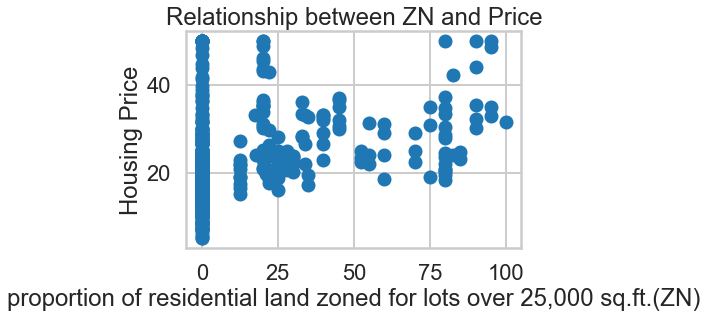

In [44]:
# your turn: 
# 3. What are some other numeric variables of interest? Why do you think they are interesting? 
# Plot scatterplots with these variables and *PRICE* (house price) and tell a story about what you see.
plt.scatter(bos.ZN, bos.PRICE)
plt.xlabel("proportion of residential land zoned for lots over 25,000 sq.ft.(ZN)")
plt.ylabel("Housing Price")
plt.title("Relationship between ZN and Price")

'''It looks like people prefer to live near residential lands zoned for lots. This must be due
to popularity of the place. Hence, the prices are high where the proportion of ZN is high.
'''

Text(0.5, 1.0, 'Relationship between NOX and Price')

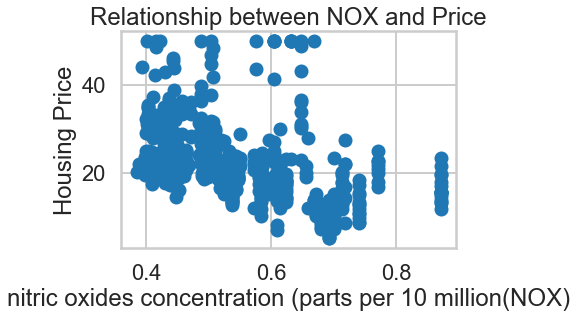

In [19]:
plt.scatter(bos.NOX, bos.PRICE)
plt.xlabel("nitric oxides concentration (parts per 10 million(NOX)")
plt.ylabel("Housing Price")
plt.title("Relationship between NOX and Price")

''' Nitric oxide concentration obviously is harmful and so housing prices are low wherever the NOX is high.
Most people prefer to live in areas where the NOX concetration is between 0.4 to 0.7.
'''

### Scatterplots using Seaborn
***

[Seaborn](https://stanford.edu/~mwaskom/software/seaborn/) is a cool Python plotting library built on top of matplotlib. It provides convenient syntax and shortcuts for many common types of plots, along with better-looking defaults.

We can also use [seaborn regplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/regression.html#functions-to-draw-linear-regression-models) for the scatterplot above. This provides automatic linear regression fits (useful for data exploration later on). Here's one example below.

<AxesSubplot:xlabel='RM', ylabel='PRICE'>

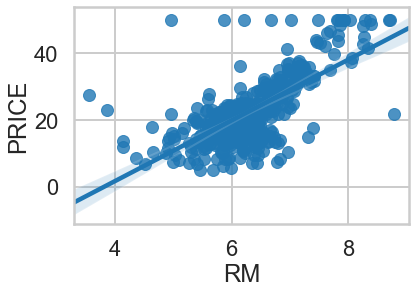

In [45]:
sns.regplot(y="PRICE", x="RM", data=bos, fit_reg = True)

### Histograms
***


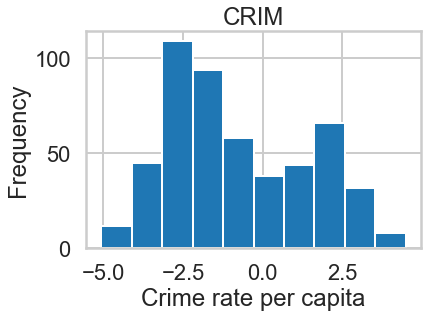

In [46]:
plt.hist(np.log(bos.CRIM))
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequency")
plt.show()

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> In the above histogram, we took the logarithm of the crime rate per capita. Repeat this histogram without taking the log. What was the purpose of taking the log? What do we gain by making this transformation? What do you now notice about this variable that is not obvious without making the transformation?

<p><b>Exercise:</b> Plot the histogram for *RM* and *PTRATIO* against each other, along with the two variables you picked in the previous section. We are looking for correlations in predictors here.</p>
</div>

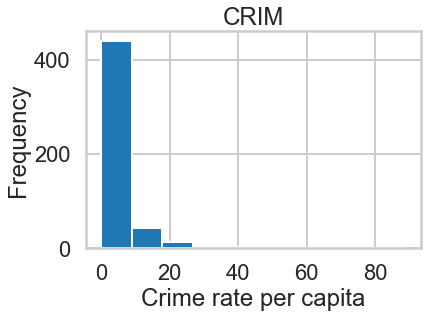

In [21]:
#your turn
# 1. In the above histogram, we took the logarithm of the crime rate per capita.
# Repeat this histogram without taking the log. What was the purpose of taking the log?
''' Purpose of taking the log was to normalize the data.
'''
# What do we gain by making this transformation? 
''' The transfformation helps better at making the prediction'''
# What do you now notice about this variable that is not obvious without making the transformation?

plt.hist(bos.CRIM)
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequency")
plt.show()

'''The CRIM values agaist frequency just looks like a bar chart but, without any normalized data and no
valuable information can be drawn from it.'''

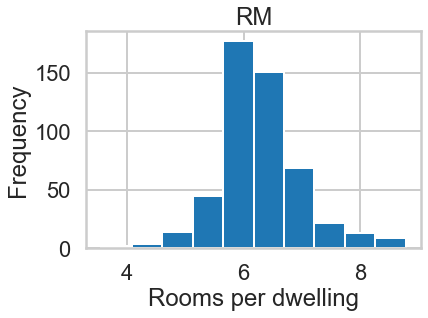

In [22]:
#Histogram for RM and PTRATIO
# 2. Plot the histogram for *RM* and *PTRATIO* against each other, 
# along with the two variables you picked in the previous section

plt.hist(bos.RM)
plt.title("RM")
plt.xlabel("Rooms per dwelling")
plt.ylabel("Frequency")
plt.show()
# Most rooms per dwelling have 6 to 7 rooms

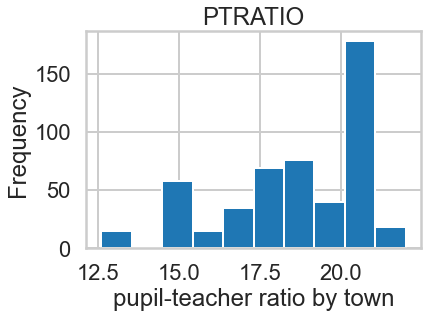

In [23]:
plt.hist(bos.PTRATIO)
plt.title("PTRATIO")
plt.xlabel("pupil-teacher ratio by town")
plt.ylabel("Frequency")
plt.show()

## Part 3: Linear Regression with Boston Housing Data Example
***

Here, 

$Y$ = boston housing prices (called "target" data in python, and referred to as the dependent variable or response variable)

and

$X$ = all the other features (or independent variables, predictors or explanatory variables)

which we will use to fit a linear regression model and predict Boston housing prices. We will use the least-squares method to estimate the coefficients.  

We'll use two ways of fitting a linear regression. We recommend the first but the second is also powerful in its features.

### Fitting Linear Regression using `statsmodels`
***
[Statsmodels](http://statsmodels.sourceforge.net/) is a great Python library for a lot of basic and inferential statistics. It also provides basic regression functions using an R-like syntax, so it's commonly used by statisticians. While we don't cover statsmodels officially in the Data Science Intensive workshop, it's a good library to have in your toolbox. Here's a quick example of what you could do with it. The version of least-squares we will use in statsmodels is called *ordinary least-squares (OLS)*. There are many other versions of least-squares such as [partial least squares (PLS)](https://en.wikipedia.org/wiki/Partial_least_squares_regression) and [weighted least squares (WLS)](https://en.wikipedia.org/wiki/Iteratively_reweighted_least_squares).

In [47]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [48]:
import statsmodels.api as sm
from patsy import dmatrices

In [49]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('PRICE ~ RM',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Sun, 13 Jun 2021   Prob (F-statistic):           2.49e-74
Time:                        13:56:06   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

#### Interpreting coefficients

There is a ton of information in this output. But we'll concentrate on the coefficient table (middle table). We can interpret the `RM` coefficient (9.1021) by first noticing that the p-value (under `P>|t|`) is so small, basically zero. This means that the number of rooms, `RM`, is a statisticall significant predictor of `PRICE`. The regression coefficient for `RM` of 9.1021 means that *on average, each additional room is associated with an increase of $\$9,100$ in house price net of the other variables*. The confidence interval gives us a range of plausible values for this average change, about ($\$8,279, \$9,925$), definitely not chump change. 

In general, the $\hat{\beta_i}, i > 0$ can be interpreted as the following: "A one unit increase in $x_i$ is associated with, on average, a $\hat{\beta_i}$ increase/decrease in $y$ net of all other variables."

On the other hand, the interpretation for the intercept, $\hat{\beta}_0$ is the average of $y$ given that all of the independent variables $x_i$ are 0.

####  `statsmodels` formulas
***
This formula notation will seem familiar to `R` users, but will take some getting used to for people coming from other languages or are new to statistics.

The formula gives instruction for a general structure for a regression call. For `statsmodels` (`ols` or `logit`) calls you need to have a Pandas dataframe with column names that you will add to your formula. In the below example you need a pandas data frame that includes the columns named (`Outcome`, `X1`,`X2`, ...), but you don't need to build a new dataframe for every regression. Use the same dataframe with all these things in it. The structure is very simple:

`Outcome ~ X1`

But of course we want to to be able to handle more complex models, for example multiple regression is doone like this:

`Outcome ~ X1 + X2 + X3`

In general, a formula for an OLS multiple linear regression is

`Y ~ X1 + X2 + ... + Xp`

This is the very basic structure but it should be enough to get you through the homework. Things can get much more complex. You can force statsmodels to treat variables as categorical with the `C()` function, call numpy functions to transform data such as `np.log` for extremely-skewed data, or fit a model without an intercept by including `- 1` in the formula. For a quick run-down of further uses see the `statsmodels` [help page](http://statsmodels.sourceforge.net/devel/example_formulas.html).


Let's see how our model actually fit our data. We can see below that there is a ceiling effect, we should probably look into that. Also, for large values of $Y$ we get underpredictions, most predictions are below the 45-degree gridlines. 

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> Create a scatterplot between the predicted prices, available in `m.fittedvalues` (where `m` is the fitted model) and the original prices. How does the plot look? Do you notice anything interesting or weird in the plot? Comment on what you see.</p>
</div>

<AxesSubplot:ylabel='PRICE'>

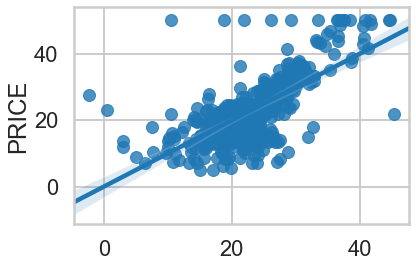

In [50]:
# your turn
# Create a scatterplot between the predicted prices, available in `m.fittedvalues` (where `m` is the fitted model) 
# and the original prices. How does the plot look? Do you notice anything interesting or weird in the plot?
# Comment on what you see.
sns.regplot(x = m.fittedvalues , y = "PRICE", data=bos, fit_reg = True)


#The predicted values are close to the actual values. The predicted values are very close to the actual values which can 
#lead to overfitting

### Fitting Linear Regression using `sklearn`


In [51]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### What can you do with a LinearRegression object? 
***
Check out the scikit-learn [docs here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). We have listed the main functions here. Most machine learning models in scikit-learn follow this same API of fitting a model with `fit`, making predictions with `predict` and the appropriate scoring function `score` for each model.

Main functions | Description
--- | --- 
`lm.fit()` | Fit a linear model
`lm.predit()` | Predict Y using the linear model with estimated coefficients
`lm.score()` | Returns the coefficient of determination (R^2). *A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model*

#### What output can you get?

In [52]:
# Look inside lm object
# lm.<tab>
lm.copy_X
lm.fit_intercept
lm.get_params
lm.normalize
lm.predict
lm.score

<bound method RegressorMixin.score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)>

Output | Description
--- | --- 
`lm.coef_` | Estimated coefficients
`lm.intercept_` | Estimated intercept 

### Fit a linear model
***

The `lm.fit()` function estimates the coefficients the linear regression using least squares. 

In [53]:
# Use all 13 predictors to fit linear regression model
lm.fit(X, bos.PRICE)
lm.score(X,bos.PRICE)

0.7406426641094095

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> How would you change the model to not fit an intercept term? Would you recommend not having an intercept? Why or why not? For more information on why to include or exclude an intercept, look [here](https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-is-regression-through-the-origin/).</p>

<p><b>Exercise:</b> One of the assumptions of the linear model is that the residuals must be i.i.d. (independently and identically distributed). To satisfy this, is it enough that the residuals are normally distributed? Explain your answer.</p>

<p><b>Exercise:</b> True or false. To use linear regression, $Y$ must be normally distributed. Explain your answer.</p>
</div>


In [55]:
# your turn
# 1. How would you change the model to not fit an intercept term? 
# Would you recommend not having an intercept? Why or why not? 
lm.fit_intercept=False  
no_intercept_lm = lm.fit(X, bos.PRICE)
""" The above model is fit with an intercept term of 0. This means that the price of a house is 0 if all predictors are 0
which is correct. Having an intercept value means that a house has a price even though all the other factors are non-existent
such as number of rooms, proximity to roads etc. which is impossible. I would recommend not having an intercept term.
"""

' The above model is fit with an intercept term of 0. This means that the price of a house is 0 if all predictors are 0\nwhich is correct. Having an intercept value means that a house has a price even though all the other factors are non-existent\nsuch as number of rooms, proximity to roads etc. which is impossible. I would recommend not having an intercept term.\n'

In [56]:
# One of the assumptions of the linear model is that the residuals must be i.i.d. (independently and identically distributed). 
# To satisfy this, is it enough that the residuals are normally distributed? Explain your answer.
'''Residuals needs to have equal variance and 0 mean along with being normally distributed. 
If Errors are normally distributed, then Linear Estimator is equivalent to Maximum Likelihood Estimator.
'''

'Residuals needs to have equal variance and 0 mean along with being normally distributed. \nIf Errors are normally distributed, then Linear Estimator is equivalent to Maximum Likelihood Estimator.\n'

In [57]:
# Should Y be normally distributed to use linear regression
'''False. Y need not be normally distributed to use linear regression
'''

'False. Y need not be normally distributed to use linear regression\n'

### Estimated intercept and coefficients

Let's look at the estimated coefficients from the linear model using `1m.intercept_` and `lm.coef_`.  

After we have fit our linear regression model using the least squares method, we want to see what are the estimates of our coefficients $\beta_0$, $\beta_1$, ..., $\beta_{13}$: 

$$ \hat{\beta}_0, \hat{\beta}_1, \ldots, \hat{\beta}_{13} $$



In [58]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: 0.0


In [59]:
print('Number of coefficients: {}'.format(len(lm.coef_)))

Number of coefficients: 13


In [60]:
# The coefficients
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,CRIM,-0.092897
1,ZN,0.048715
2,INDUS,-0.004060
3,CHAS,2.853999
4,NOX,-2.868436
5,RM,5.928148
6,AGE,-0.007269
7,DIS,-0.968514
8,RAD,0.171151
9,TAX,-0.009396


### Predict Prices 

We can calculate the predicted prices ($\hat{Y}_i$) using `lm.predict`. 

$$ \hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_1 + \ldots \hat{\beta}_{13} X_{13} $$

In [61]:
# first five predicted prices
lm.predict(X)[0:5]

array([29.09826353, 24.50227548, 31.22742641, 29.7071035 , 29.56479572])

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set III</h3>

<p><b>Exercise:</b> Histogram: Plot a histogram of all the predicted prices. Write a story about what you see. Describe the shape, center and spread of the distribution. Are there any outliers? What might be the reason for them? Should we do anything special with them?</p>

<p><b>Exercise:</b> Scatterplot: Let's plot the true prices compared to the predicted prices to see they disagree (we did this with `statsmodels` before).</p>

<p><b>Exercise:</b> We have looked at fitting a linear model in both `statsmodels` and `scikit-learn`. What are the advantages and disadvantages of each based on your exploration? Based on the information provided by both packages, what advantage does `statsmodels` provide?</p>
</div>

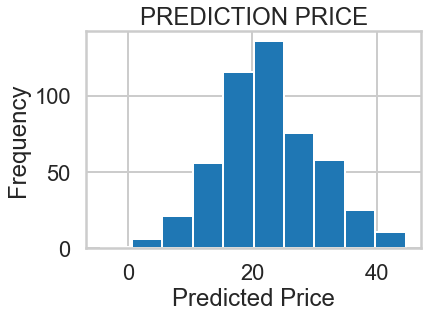

In [38]:
# your turn
# 1. Plot a histogram of all the predicted prices. Write a story about what you see.
#Describe the shape, center and spread of the distribution. 
#Are there any outliers? What might be the reason for them? Should we do anything special with them?

plt.hist(lm.predict(X))
plt.title("PREDICTION PRICE")
plt.xlabel("Predicted Price")
plt.ylabel("Frequency")
plt.show()

# The histogram seems to be normally distributed. The predicted prices are between 15 to 35 and the centre is a
# about 20. There are some outliers where the predicted prices are close to 0 but that could be because of values of
# predictors being close to 0. We do not need to do anything special for them. It just means that the price is
# close to 0 when all other predictors are 0

<AxesSubplot:ylabel='PRICE'>

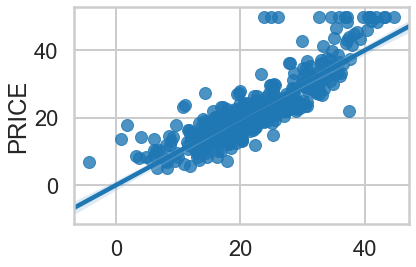

In [40]:
# Let's plot the true prices compared to the predicted prices to see they disagree (we did this with `statsmodels` before).

sns.regplot(x=lm.predict(X), y=bos['PRICE'], data=bos, fit_reg=True)

In [62]:
# We have looked at fitting a linear model in both `statsmodels` and `scikit-learn`. 
# What are the advantages and disadvantages of each based on your exploration?
#Based on the information provided by both packages, what advantage does `statsmodels` provide?
# Scikit-learn has a more computer science oriented approach to it and allows for data exploration
# using code. But, statsmodel is more useful as it provides a statisticians approach to using linear regression
# statsmodel is more easier to use and it provides better descriptions of outputs and helps make better inferences

### Evaluating the Model: Sum-of-Squares

The partitioning of the sum-of-squares shows the variance in the predictions explained by the model and the variance that is attributed to error.

$$TSS = ESS + RSS$$

#### Residual Sum-of-Squares (aka $RSS$)

The residual sum-of-squares is one of the basic ways of quantifying how much error exists in the fitted model. We will revisit this in a bit.

$$ RSS = \sum_{i=1}^N r_i^2 = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

In [63]:
#RSS = sum of square of actual value minus predicted value
print(np.sum((bos.PRICE - lm.predict(X)) ** 2))

12228.046261044004


#### Explained Sum-of-Squares (aka $ESS$)

The explained sum-of-squares measures the variance explained by the regression model.

$$ESS = \sum_{i=1}^N \left( \hat{y}_i - \bar{y} \right)^2 = \sum_{i=1}^N \left( \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) - \bar{y} \right)^2$$

In [64]:
#ESS = sum of square of predicted values minus the mean of actual values
print(np.sum((lm.predict(X) - np.mean(bos.PRICE))**2))

31908.78970831645


### Evaluating the Model: The Coefficient of Determination ($R^2$)

The coefficient of determination, $R^2$, tells us the percentage of the variance in the response variable $Y$ that can be explained by the linear regression model.

$$ R^2 = \frac{ESS}{TSS} $$

The $R^2$ value is one of the most common metrics that people use in describing the quality of a model, but it is important to note that *$R^2$ increases artificially as a side-effect of increasing the number of independent variables.* While $R^2$ is reported in almost all statistical packages, another metric called the *adjusted $R^2$* is also provided as it takes into account the number of variables in the model, and can sometimes even be used for non-linear regression models!

$$R_{adj}^2 = 1 - \left( 1 - R^2 \right) \frac{N - 1}{N - K - 1} = R^2 - \left( 1 - R^2 \right) \frac{K}{N - K - 1} = 1 - \frac{\frac{RSS}{DF_R}}{\frac{TSS}{DF_T}}$$

where $N$ is the number of observations, $K$ is the number of variables, $DF_R = N - K - 1$ is the degrees of freedom associated with the residual error and $DF_T = N - 1$ is the degrees of the freedom of the total error.

### Evaluating the Model: Mean Squared Error and the $F$-Statistic
***
The mean squared errors are just the *averages* of the sum-of-squares errors over their respective degrees of freedom.

$$MSR = \frac{ESS}{K}$$

$$MSE = \frac{RSS}{N-K-1}$$

**Remember:** Notation may vary across resources particularly the use of *R* and *E* in *RSS/ESS* and *MSR/MSE*. In some resources, E = explained and R = residual. In other resources, E = error and R = regression (explained). **This is a very important distinction that requires looking at the formula to determine which naming scheme is being used.**

Given the MSR and MSE, we can now determine whether or not the entire model we just fit is even statistically significant. We use an $F$-test for this. The null hypothesis is that all of the $\beta$ coefficients are zero, that is, none of them have any effect on $Y$. The alternative is that *at least one* $\beta$ coefficient is nonzero, but it doesn't tell us which one in a multiple regression:

$$H_0: \beta_i = 0, \mbox{for all $i$} \\
H_A: \beta_i > 0, \mbox{for some $i$}$$ 

$$F = \frac{MSR}{MSE} = \left( \frac{R^2}{1 - R^2} \right) \left( \frac{N - K - 1}{K} \right)$$
 
Once we compute the $F$-statistic, we can use the $F$-distribution with $N-K$ and $K-1$ degrees of degrees of freedom to get a p-value.

**Warning!** The $F$-statistic mentioned in this section is NOT the same as the F1-measure or F1-value discused in Unit 7.

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set IV</h3>

<p>Let's look at the relationship between `PTRATIO` and housing price.</p>

<p><b>Exercise:</b> Try fitting a linear regression model using only the 'PTRATIO' (pupil-teacher ratio by town) and interpret the intercept and the coefficients.</p>

<p><b>Exercise:</b> Calculate (or extract) the $R^2$ value. What does it tell you?</p>

<p><b>Exercise:</b> Compute the $F$-statistic. What does it tell you?</p>

<p><b>Exercise:</b> Take a close look at the $F$-statistic and the $t$-statistic for the regression coefficient. What relationship do you notice? Note that this relationship only applies in *simple* linear regression models.</p>
</div>

In [70]:
# your turn
# Try fitting a linear regression model using only the 'PTRATIO' (pupil-teacher ratio by town) 
# and interpret the intercept and the coefficients.
y1 = pd.DataFrame(bos['PRICE'])
x1 = pd.DataFrame(bos['PTRATIO'])
lm2 = LinearRegression()
lm2.fit(x1,y1)

print("Intercept = ",lm2.intercept_, "Coefficient = ",lm2.coef_)

# The intercept shows that the price will be 62.344 even though the PTRATIO is 0. Which means that
# people buy houses even in areas where schools are not available
# The coefficient -2.15 means that the price decreases with higher pupil teacher ratio. Which means that
# the costlier houses are near schools that can afford to have more teachers which is a sensible inference

Intercept =  [62.34462747] Coefficient =  [[-2.1571753]]


In [45]:
# Calculating the R-Square value
# R^2 = ESS/TSS
# TSS = ESS + RSS
ess = np.sum((lm2.predict(x1) - np.mean(y1['PRICE']))**2)
rss = np.sum((y1 - lm2.predict(x1)) ** 2)
tss = ess + rss
r_square = ess/tss
r_square

# R-square value indicates that the model is inadequate to make a prediction since it is 0.25 which is very low

PRICE    0.257847
dtype: float64

In [46]:
# Compute F-statistic
# F = MSR/MSE
# MSR = ESS/K where K = number of variables/predictors
# MSE = RSS/(N-K-1) where N = number of observations
k = 1
n = x1.shape[0]
msr = ess/k
mse = rss/(n - k - 1)
f_stat = msr/mse
f_stat

PRICE    175.105543
dtype: float64

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set V</h3>

<p>Fit a linear regression model using three independent variables</p>

<ol>
<li> 'CRIM' (per capita crime rate by town)
<li> 'RM' (average number of rooms per dwelling)
<li> 'PTRATIO' (pupil-teacher ratio by town)
</ol>

<p><b>Exercise:</b> Compute or extract the $F$-statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Compute or extract the $R^2$ statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Which variables in the model are significant in predicting house price? Write a story that interprets the coefficients.</p>
</div>

In [48]:
# your turn
lm3 = LinearRegression()
x2 = pd.DataFrame(X[['CRIM','RM','PTRATIO']])
y2 = pd.DataFrame(bos.PRICE)
lm3.fit(x2,y2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
# F-statistic of the model
# Compute or extract F-statistic
ess2 = np.sum((lm3.predict(x2) - np.mean(y2['PRICE']))**2)
rss2 = np.sum((y2 - lm3.predict(x2)) ** 2)
tss2 = ess2 + rss2
r_square2 = ess2/tss2

# F = MSR/MSE
# MSR = ESS/K where K = number of variables/predictors
# MSE = RSS/(N-K-1) where N = number of observations
k = 3
n = x2.shape[0]
msr2 = ess2/k
mse2 = rss2/(n - k - 1)
f_stat2 = msr2/mse2
f_stat2

PRICE    245.16449
dtype: float64

In [50]:
# R-Square value of the model
ess2 = np.sum((lm3.predict(x2) - np.mean(y2['PRICE']))**2)
rss2 = np.sum((y2 - lm3.predict(x2)) ** 2)
tss2 = ess2 + rss2
r_square2 = ess2/tss2
r_square2

PRICE    0.594341
dtype: float64

In [51]:
# Which variables in the model are significant in predicting house prices
print("Coefficients: ",lm3.coef_)
print("Intercept: ",lm3.intercept_)

# RM is significant in predicting house prices. It has a high value of coefficient and so it plays a major role 

Coefficients:  [[-0.20496083  7.3804111  -1.0695461 ]]
Intercept:  [-3.37070434]


## Part 4: Comparing Models

During modeling, there will be times when we want to compare models to see which one is more predictive or fits the data better. There are many ways to compare models, but we will focus on two.

### The $F$-Statistic Revisited

The $F$-statistic can also be used to compare two *nested* models, that is, two models trained on the same dataset where one of the models contains a *subset* of the variables of the other model. The *full* model contains $K$ variables and the *reduced* model contains a subset of these $K$ variables. This allows us to add additional variables to a base model and then test if adding the variables helped the model fit.

$$F = \frac{\left( \frac{RSS_{reduced} - RSS_{full}}{DF_{reduced} - DF_{full}} \right)}{\left( \frac{RSS_{full}}{DF_{full}} \right)}$$

where $DF_x = N - K_x - 1$ where $K_x$ is the number of variables in model $x$.

### Akaike Information Criterion (AIC)

Another statistic for comparing two models is AIC, which is based on the likelihood function and takes into account the number of variables in the model.

$$AIC = 2 K - 2 \log_e{L}$$

where $L$ is the likelihood of the model. AIC is meaningless in the absolute sense, and is only meaningful when compared to AIC values from other models. Lower values of AIC indicate better fitting models.

`statsmodels` provides the AIC in its output.

<div class="span5 alert alert-info">
<h3>Part 4 Checkup Exercises</h3>

<p><b>Exercise:</b> Find another variable (or two) to add to the model we built in Part 3. Compute the $F$-test comparing the two models as well as the AIC. Which model is better?</p>
</div>

In [52]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [53]:
#Checking other useful variables other than 'CRIM','RM','PTRATIO'
bos.head()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [54]:
lm4 = ols('PRICE ~ CRIM+RM+PTRATIO+LSTAT+RAD',bos).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     215.9
Date:                Sat, 12 Jun 2021   Prob (F-statistic):          2.19e-122
Time:                        17:22:24   Log-Likelihood:                -1549.2
No. Observations:                 506   AIC:                             3110.
Df Residuals:                     500   BIC:                             3136.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.9453      4.131      4.587      0.0

In [55]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula
# Compute the  𝐹 -test comparing the two models as well as the AIC. Which model is better?
lm_3 = ols('PRICE ~ CRIM+RM+PTRATIO',bos).fit()
df5, df3 = len(bos.PRICE)-5-1, len(bos.PRICE)-3-1
F_stat = ((lm_3.ssr - lm4.ssr)/(df3-df5))/(lm4.ssr/df5)
print('F-statistic comparing 5-feature model with 3-feature model: {0:.3f}'.format(F_stat))

F-statistic comparing 5-feature model with 3-feature model: 70.376



## Part 5: Evaluating the Model via Model Assumptions and Other Issues
***
Linear regression makes several assumptions. It is always best to check that these assumptions are valid after fitting a linear regression model.

<div class="span5 alert alert-danger">
<ul>
  <li>**Linearity**. The dependent variable $Y$ is a linear combination of the regression coefficients and the independent variables $X$. This can be verified with a scatterplot of each $X$ vs. $Y$ and plotting correlations among $X$. Nonlinearity can sometimes be resolved by [transforming](https://onlinecourses.science.psu.edu/stat501/node/318) one or more independent variables, the dependent variable, or both. In other cases, a [generalized linear model](https://en.wikipedia.org/wiki/Generalized_linear_model) or a [nonlinear model](https://en.wikipedia.org/wiki/Nonlinear_regression) may be warranted.</li>
  <li>**Constant standard deviation**. The SD of the dependent variable $Y$ should be constant for different values of X. We can check this by plotting each $X$ against $Y$ and verifying that there is no "funnel" shape showing data points fanning out as $X$ increases or decreases. Some techniques for dealing with non-constant variance include weighted least squares (WLS), [robust standard errors](https://en.wikipedia.org/wiki/Heteroscedasticity-consistent_standard_errors), or variance stabilizing transformations.
    </li>
  <li> **Normal distribution for errors**.  The $\epsilon$ term we discussed at the beginning are assumed to be normally distributed. This can be verified with a fitted values vs. residuals plot and verifying that there is no pattern, and with a quantile plot.
  $$ \epsilon_i \sim N(0, \sigma^2)$$
Sometimes the distributions of responses $Y$ may not be normally distributed at any given value of $X$.  e.g. skewed positively or negatively. </li>
<li> **Independent errors**.  The observations are assumed to be obtained independently.
    <ul>
        <li>e.g. Observations across time may be correlated
    </ul>
</li>
</ul>  

</div>

There are some other issues that are important investigate with linear regression models.

<div class="span5 alert alert-danger">
<ul>
  <li>**Correlated Predictors:** Care should be taken to make sure that the independent variables in a regression model are not too highly correlated. Correlated predictors typically do not majorly affect prediction, but do inflate standard errors of coefficients making interpretation unreliable. Common solutions are dropping the least important variables involved in the correlations, using regularlization, or, when many predictors are highly correlated, considering a dimension reduction technique such as principal component analysis (PCA).
  <li>**Influential Points:** Data points that have undue influence on the regression model. These points can be high leverage points or outliers. Such points are typically removed and the regression model rerun.
</ul>
</div>


<div class="span5 alert alert-info">
<h3>Part 5 Checkup Exercises</h3>

<p>Take the reduced model from Part 3 to answer the following exercises. Take a look at [this blog post](http://mpastell.com/2013/04/19/python_regression/) for more information on using statsmodels to construct these plots.</p>
    
<p><b>Exercise:</b> Construct a fitted values versus residuals plot. What does the plot tell you? Are there any violations of the model assumptions?</p>

<p><b>Exercise:</b> Construct a quantile plot of the residuals. What does the plot tell you?</p>

<p><b>Exercise:</b> What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?</p>

<p><b>Exercise:</b> Identify any outliers (if any) in your model and write a story describing what these outliers might represent.</p>

<p><b>Exercise:</b> Construct a leverage plot and identify high leverage points in the model. Write a story explaining possible reasons for the high leverage points.</p>

<p><b>Exercise:</b> Remove the outliers and high leverage points from your model and run the regression again. How do the results change?</p>
</div>

[Text(0.5, 0, 'Model Fitted House Price'),
 Text(0, 0.5, 'Residuals'),
 Text(0.5, 1.0, 'Residual vs. Fitted Values')]

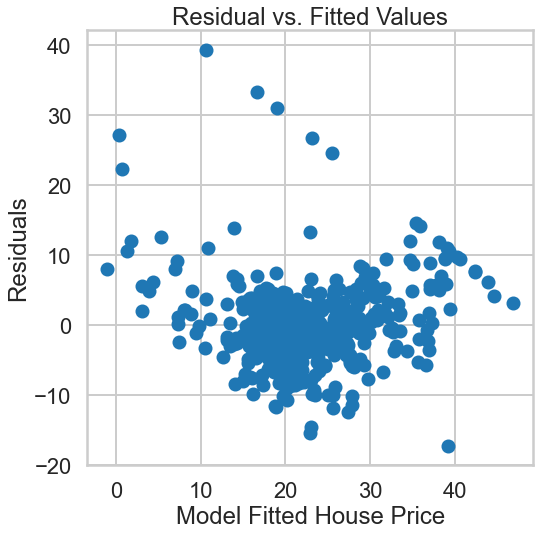

In [56]:
# Your turn.
# 1. Construct a fitted values versus residuals plot. 
#What does the plot tell you? Are there any violations of the model assumptions?
f, ax = plt.subplots(figsize=(8, 8))
ax.scatter(lm_3.fittedvalues, lm_3.resid)
ax.set(xlabel = 'Model Fitted House Price', ylabel = 'Residuals', title = 'Residual vs. Fitted Values')

'''Some of the residual values are negative which means the model is oversestimating the prices of the houses.
Some residuals are very high which means that the model is predicting the price very low which means that 
the model has not interpreted those data points correctly. Most of the values are close to 0 which means the model 
has made quite a few almost correct predictions
'''

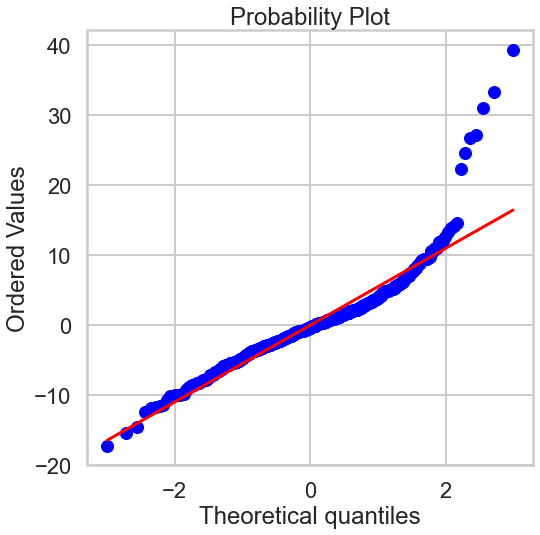

In [62]:
# 2.Construct a quantile plot of the residuals. What does the plot tell you?
import pylab
f, ax = plt.subplots(figsize=(8, 8))
stats.probplot(lm_3.resid, dist='norm', plot=ax)
plt.show()
# The quantile plot shows that some values are overestimated while some have been correctly estimated

In [58]:
# 3.What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?
'''Fitted vs. Residual plot enables us to visualize the residuals for each observation.
It helps us identify if there are any specific patterns in the residues relative to the fitted values
The quantile plots simply checks how close the set of samples are
to a particular distribution (normal distribution in our above case)'''

In [64]:
# 4.Identify any outliers (if any) in your model and write a story describing what these outliers might represent.
bos['Prediction'] = lm_3.fittedvalues
bos['Residues'] = lm_3.resid
outliers = bos[abs(lm_3.resid)>20]
outliers

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,Prediction,Residues
365,4.55587,0.0,18.1,0.0,0.718,3.561,87.9,1.6132,24.0,666.0,20.2,354.70,7.12,27.5,0.372333,27.127667
367,13.52220,0.0,18.1,0.0,0.631,3.863,100.0,1.5106,24.0,666.0,20.2,131.42,13.33,23.1,0.763471,22.336529
368,4.89822,0.0,18.1,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26,50.0,10.701164,39.298836
369,5.66998,0.0,18.1,1.0,0.631,6.683,96.8,1.3567,24.0,666.0,20.2,375.33,3.73,50.0,23.185628,26.814372
370,6.53876,0.0,18.1,1.0,0.631,7.016,97.5,1.2024,24.0,666.0,20.2,392.05,2.96,50.0,25.465239,24.534761
371,9.23230,0.0,18.1,0.0,0.631,6.216,100.0,1.1691,24.0,666.0,20.2,366.15,9.53,50.0,19.008840,30.991160
372,8.26725,0.0,18.1,1.0,0.668,5.875,89.6,1.1296,24.0,666.0,20.2,347.88,8.88,50.0,16.689917,33.310083


In [65]:
bos=bos.drop(['Residues', 'Prediction'], axis=1)
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [66]:
'''They all have positive residues with values > 20
They all have identical ZN, INDUS, RAD, TAX, PTRATIO and similar NOX
This means that all these observations are in the same area or are in close proximity
The reason for high residual values is due to the model underestimating the true price.
Since our model just uses 'CRIM', 'PTRATIO' and 'RM',
we notice that the per capita crime rate is very high at these outlier points.
All the CRIM values are > 75 percent of the points. 
This indicates that this area is not a good one
and it is very unlikely that the house price here is 50k (which is the highest provided in this data set)
Hence, we remove these 7 outliers from our data set'''

"They all have positive residues with values > 20\nThey all have identical ZN, INDUS, RAD, TAX, PTRATIO and similar NOX\nThis tends to hint that all these observations are from the same town/locality\nThe reason for high residue is due to our models low prediction relative to its true price.\nSince our model just uses 'CRIM', 'PTRATIO' and 'RM',\nwe notice that the per capita crime rate is very high at these outlier points.\nAll the CRIM values are > 75 percentile points. \nThough not modelled, the NOX value too is >75 percentile value. \nThis indicates that the neighborhood under consideration is not the best \nand it is very unlikely that the house price here is 50k (which is the highest provided in this data set)\nHence, we remove these 7 outliers from our data set"

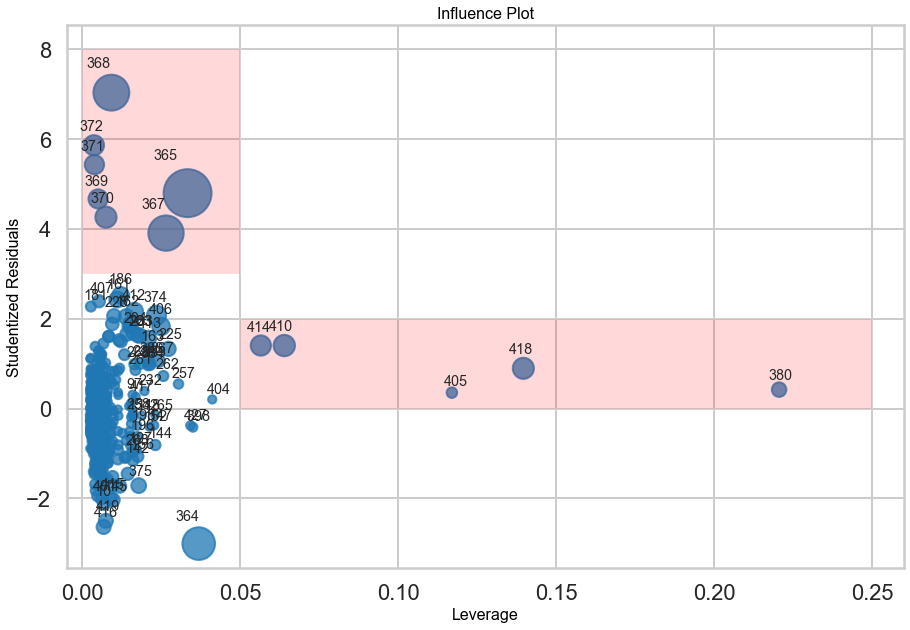

In [67]:
# 5.Construct a leverage plot and identify high leverage points in the model. 
#Write a story explaining possible reasons for the high leverage points.
from statsmodels.graphics.regressionplots import *
fig, axes = plt.subplots(figsize=(15,10))

fig = influence_plot(lm_3, ax = axes)
axes.fill_between([0.05,0.25], 0, 2, facecolor='red', alpha = .15, interpolate=True)
axes.fill_between([0, 0.05], 3, 8, facecolor='red', alpha = .15, interpolate=True)
axes.set(xlim=[-0.005, 0.26], xlabel = 'Leverage')
plt.show()

In [68]:
'''The above plots the Leverage vs. Studentized Residuals with the size of the circle indicating the 
influence the observation has. The 7 observations [365, 367, 368, 369, 370, 371, 372] have high residual values. 
These have been as outliers above in the 'Outlier Detection' section as having residues > 20
The other set of 5 observations [380, 405, 410, 414, 418] are all high leverage points.
High leverage correspond to those observations whose 'x' values are extreme.
Taking a look into these 5 observations to see the extreme values in these observations'''

"The above plots the Leverage vs. Studentized Residuals with the size of the circle indicating the \ninfluence the observation has. The 7 observations [365, 367, 368, 369, 370, 371, 372] are have high residues. \nThese have been as outliers above in the 'Outlier Detection' section as having residues > 20\nThe other block of 5 observations [380, 405, 410, 414, 418] are all high leverage points.\nHigh leverage correspond to those observations whose 'x' values are extreme.\nLet us look into these 5 observations to see what are the extreme values in these observations"

In [69]:
bos.iloc[[380, 405, 410, 414, 418]]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
380,88.9762,0.0,18.1,0.0,0.671,6.968,91.9,1.4165,24.0,666.0,20.2,396.90,17.21,10.4
405,67.9208,0.0,18.1,0.0,0.693,5.683,100.0,1.4254,24.0,666.0,20.2,384.97,22.98,5.0
410,51.1358,0.0,18.1,0.0,0.597,5.757,100.0,1.4130,24.0,666.0,20.2,2.60,10.11,15.0
414,45.7461,0.0,18.1,0.0,0.693,4.519,100.0,1.6582,24.0,666.0,20.2,88.27,36.98,7.0
418,73.5341,0.0,18.1,0.0,0.679,5.957,100.0,1.8026,24.0,666.0,20.2,16.45,20.62,8.8


In [70]:
bos['zstar_CRIM'] = (bos.CRIM-np.mean(bos.CRIM))/np.std(bos.CRIM)
print('The 5 highest per capita crime rate: \n{}'.format(bos[['CRIM', 'zstar_CRIM']].sort_values('CRIM').tail(5)))

The 5 highest per capita crime rate: 
        CRIM  zstar_CRIM
414  45.7461    4.903104
410  51.1358    5.530321
405  67.9208    7.483646
418  73.5341    8.136884
380  88.9762    9.933931


In [71]:
bos.CRIM.describe()

count    506.000000
mean       3.613524
std        8.601545
min        0.006320
25%        0.082045
50%        0.256510
75%        3.677083
max       88.976200
Name: CRIM, dtype: float64

In [71]:
'''These are the observations with the 5 highest CRIM value. 
The CRIM values have mean = 3.59 and std = 8.59. 
Also note that the z* for these CRIM values are very high (4.9 to 9.94). 
These high leverage points with high CRIM rate appears to be from the 
same town as the 7-outlier points (same ZN, INDUS, RAD, TAX and PTRATIO)'''

'These are the observations with the 5 highest CRIM value. \nThe CRIM values have mean = 3.59 and std = 8.59. \nAlso note that the z* for these CRIM values are very high (4.9 to 9.94). \nThese high leverage points with high CRIM rate appears to be from the \nsame town as the 7-outlier points (same ZN, INDUS, RAD, TAX and PTRATIO)'

In [73]:
# 6. Remove the outliers and high leverage points from your model and run the regression again. How do the results change?

# Dropping outliers and high leverage observations
bos_clean = bos.drop([365, 367, 368, 369, 370, 371, 372, 380, 405, 410, 414, 418], axis=0)
bos_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 494 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CRIM        494 non-null    float64
 1   ZN          494 non-null    float64
 2   INDUS       494 non-null    float64
 3   CHAS        494 non-null    float64
 4   NOX         494 non-null    float64
 5   RM          494 non-null    float64
 6   AGE         494 non-null    float64
 7   DIS         494 non-null    float64
 8   RAD         494 non-null    float64
 9   TAX         494 non-null    float64
 10  PTRATIO     494 non-null    float64
 11  B           494 non-null    float64
 12  LSTAT       494 non-null    float64
 13  PRICE       494 non-null    float64
 14  zstar_CRIM  494 non-null    float64
dtypes: float64(15)
memory usage: 61.8 KB


In [74]:
# Regression
m_clean = ols('PRICE ~ CRIM+RM+PTRATIO',bos_clean).fit()
print(m_clean.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     426.4
Date:                Sat, 12 Jun 2021   Prob (F-statistic):          3.64e-136
Time:                        22:55:11   Log-Likelihood:                -1456.3
No. Observations:                 494   AIC:                             2921.
Df Residuals:                     490   BIC:                             2937.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.8011      3.259     -2.087      0.0

[Text(0.5, 0, 'Model Fitted House Price'),
 Text(0, 0.5, 'Residuals'),
 Text(0.5, 1.0, 'Residual vs. Fitted Values'),
 (-5.0, 50.0)]

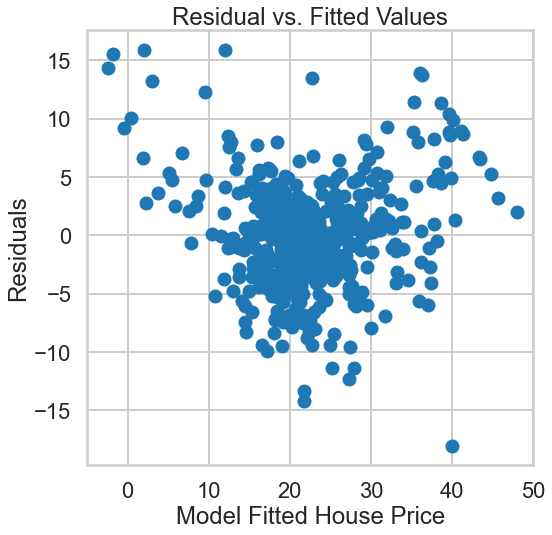

In [75]:
# Residual vs. Fitted value plot
f, ax = plt.subplots(figsize=(8, 8))
ax.scatter(m_clean.fittedvalues, m_clean.resid)
ax.set(xlabel='Model Fitted House Price', ylabel='Residuals', title='Residual vs. Fitted Values', xlim = [-5, 50])

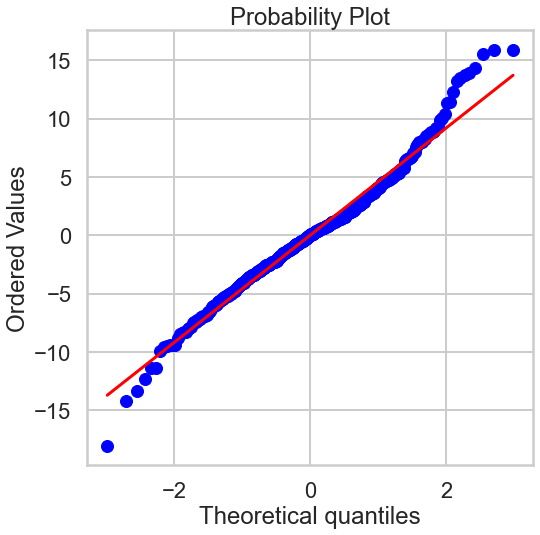

In [76]:
f, ax = plt.subplots(figsize=(8, 8))
stats.probplot(m_clean.resid, dist='norm', plot=ax)
plt.show()

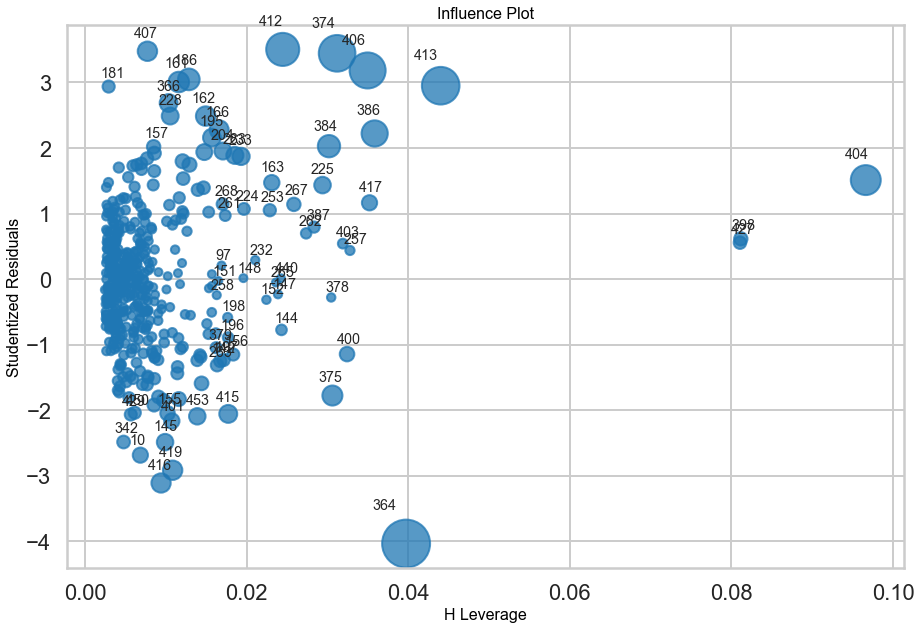

In [77]:
from statsmodels.graphics.regressionplots import *
fig, axes = plt.subplots(figsize=(15,10))
fig = influence_plot(m_clean, ax = axes)
plt.show()